In [1]:
print("Hello world")

Hello world


In [3]:
%pip install pandas
%pip install seaborn
%pip install numpy
%pip install matplotlib
%pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/250.0 kB 186.2 kB/s eta 0:00:02
     ------ ------------------------------ 41.0/250.0 kB 195.7 kB/s eta 0:00:02
     ---------- -------------------------- 71.7/250.0 kB 280.5 kB/s eta 0:00:01
     -------------------- --------------- 143.4/250.0 kB 500.5 kB/s eta 0:00:01
     -------------------------------- --- 225.3/250.0 kB 687.0 kB/s eta 0:00:01
     -----------------------------------  245.8/250.0 kB 718.0 kB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 639.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data=pd.read_excel("F:/data science/Data Science Real World Projects in Python/Project 1-- Predict Fare of Airlines Tickets using Machine Learning/Files/Data_Train.xlsx")

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isna().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [11]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\3393430198.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data[col]=pd.to_datetime(train_data[col])
C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\3393430198.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[col]=pd.to_datetime(train_data[col])
C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\3393430198.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[col]=pd.to_datetime(train_data[col])


In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
train_data['journey_day']=train_data['Date_of_Journey'].dt.day
train_data['journey_month']=train_data['Date_of_Journey'].dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-23 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-23 05:50:00,2024-01-23 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-23 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-01-23 18:05:00,2024-01-23 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-01-23 16:50:00,2024-01-23 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [15]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)  

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-01-23 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-23 05:50:00,2024-01-23 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-23 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-01-23 18:05:00,2024-01-23 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-01-23 16:50:00,2024-01-23 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [17]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
def extract_min(df,col):
    df[col+'_minute']=df[col].dt.minute
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [18]:
for i in ['Dep_Time','Arrival_Time']:
    extract_hour(train_data,i)
    extract_min(train_data,i)
    drop_column(train_data,i)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
duration = list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour


In [21]:
train_data['Duration']=duration

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [24]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(minute)

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [26]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [27]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Duration               object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int32
journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hours          int32
Duration_mins           int32
dtype: object

In [28]:
#Catagorical Data
cat_col=[column for column in train_data.columns if train_data[column].dtype=='O']
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [29]:
#Continuous Data
cont_col=[column for column in train_data.columns if train_data[column].dtype!='O']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [30]:
#Nominal Data --> data are not in any order --> OneHotEncoder is used in this case
#Ordinal Data --> data are in order --> LabelEncoder is used in this case

In [31]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info


<Axes: xlabel='Total_Stops', ylabel='Price'>

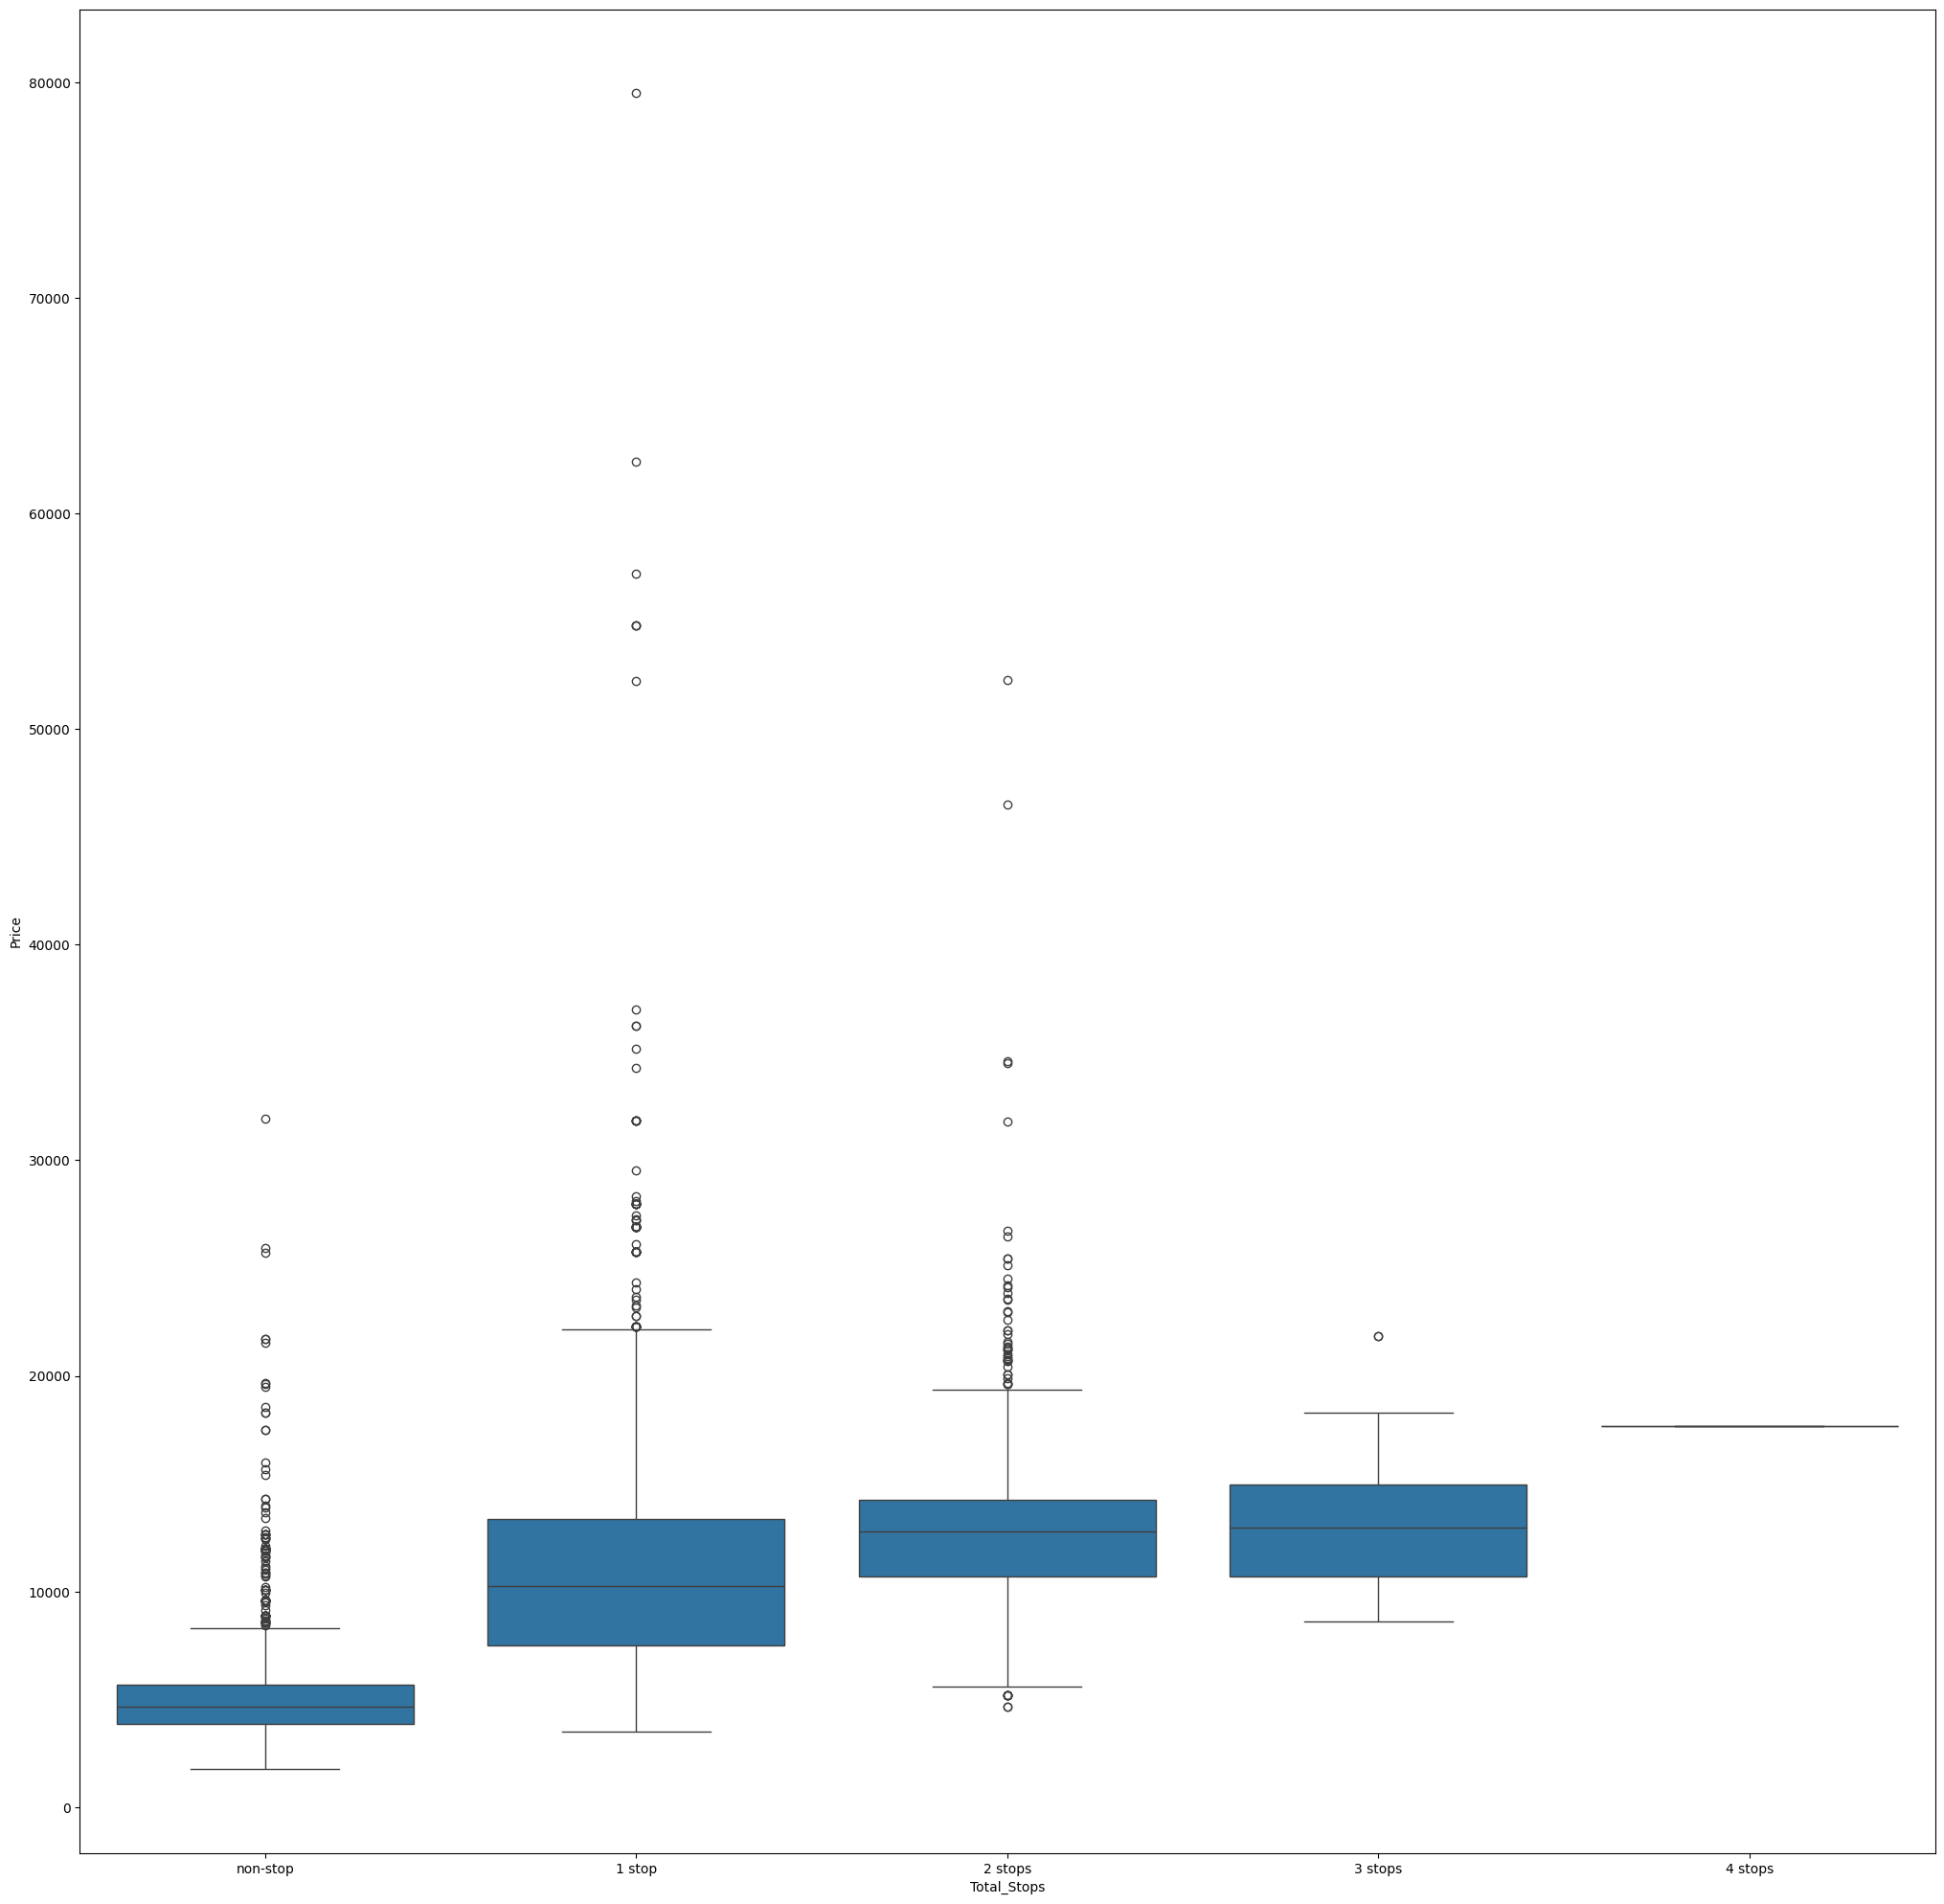

In [32]:
plt.figure(figsize=(25,25))
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=True))


In [33]:
categorical['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [34]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline=Airline.astype(int)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [35]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source=Source.astype(int)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination=Destination.astype(int)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [37]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [38]:
categorical['Route_1']=categorical['Route'].str.split('→ ').str[0]
categorical['Route_2']=categorical['Route'].str.split('→ ').str[1]
categorical['Route_3']=categorical['Route'].str.split('→ ').str[2]
categorical['Route_4']=categorical['Route'].str.split('→ ').str[3]
categorical['Route_5']=categorical['Route'].str.split('→ ').str[4]

C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\297162134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1']=categorical['Route'].str.split('→ ').str[0]
C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\297162134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2']=categorical['Route'].str.split('→ ').str[1]
C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\297162134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [39]:
categorical.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [40]:
categorical.isna().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Duration               0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [41]:
categorical.drop('Route',axis=1,inplace=True)

C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\2375851814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.drop('Route',axis=1,inplace=True)


In [42]:
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\2414967305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i].fillna('None',inplace=True)


In [43]:
categorical.isna().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [44]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Duration has total 368 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [45]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [47]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\1502836837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])
C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\1502836837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])
C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\1502836837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [48]:
categorical.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,0,13,24,12,4
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,2,25,1,3,4
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,No info,3,32,4,5,4
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,2,34,3,12,4
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,0,34,8,12,4


In [49]:
drop_column(categorical,'Additional_Info')

C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\1879880847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col,axis=1,inplace=True)


In [50]:
categorical['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [51]:
categorical.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\3267321659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)


In [52]:
categorical.head()

,Airline,Source,Destination,Duration,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0,0,13,24,12,4
1,Air India,Kolkata,Banglore,7h 25m,2,2,25,1,3,4
2,Jet Airways,Delhi,Cochin,19h 0m,2,3,32,4,5,4
3,IndiGo,Kolkata,Banglore,5h 25m,1,2,34,3,12,4
4,IndiGo,Banglore,New Delhi,4h 45m,1,0,34,8,12,4


In [69]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)

In [70]:
data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,0,13,24,12,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,2,25,1,3,4,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2,3,32,4,5,4,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,2,34,3,12,4,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,0,34,8,12,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [71]:
data_train.drop('Airline',axis=1,inplace=True)
data_train.drop('Source',axis=1,inplace=True)
data_train.drop('Destination',axis=1,inplace=True)
data_train.drop('Duration',axis=1,inplace=True)

In [72]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,24,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [73]:
pd.set_option('display.max_columns',36)

In [74]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,24,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [75]:
#Handling Outliers
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(x=df[col],ax=ax2)

C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\3588960009.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


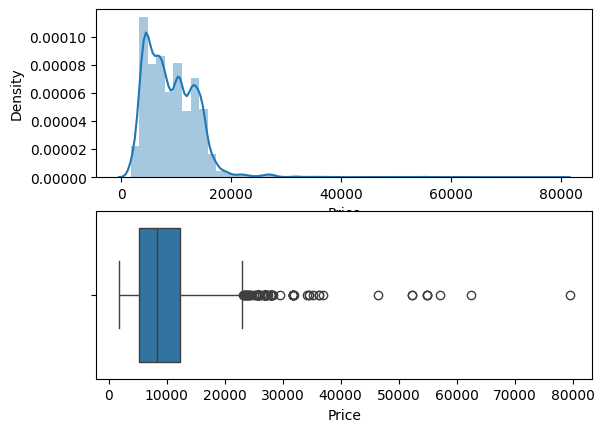

In [76]:
plot(data_train,'Price')

In [77]:
data_train['Price']= np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

C:\Users\aimsh\AppData\Local\Temp\ipykernel_5584\3588960009.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)


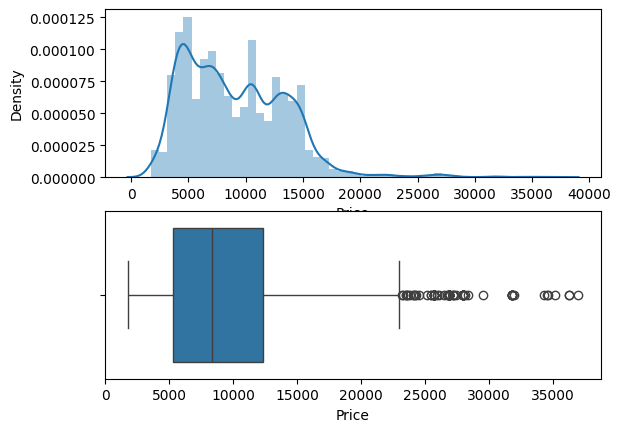

In [78]:
plot(data_train,'Price')

In [79]:
#Seperating Independent and Dependent Variables/Features
#Independent Variables/Features
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,24,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,5,50,13,15,7,25
2,2,3,32,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9,6,9,25,4,25,19,0
3,1,2,34,3,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,18,5,23,30,5,25
4,1,0,34,8,12,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,16,50,21,35,4,45


In [80]:
#Dependent Variables/Features
y=data_train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [83]:
#selecting best features using feature importance
from sklearn.feature_selection import mutual_info_classif

In [84]:
mutual_info_classif(X,y)

array([1.88680372, 2.33968972, 2.99018492, 2.5866112 , 1.68259838,
       1.43188828, 0.67811525, 0.09161097, 0.62068138, 0.86580089,
       0.01048586, 0.51108416, 0.00856571, 0.2922318 , 0.        ,
       0.20376516, 0.        , 0.16272218, 1.38409186, 0.82888555,
       0.28305923, 1.36212757, 0.39291514, 0.2777748 , 0.17167802,
       0.3328904 , 0.88259872, 1.63484854, 1.51002561, 1.27530041,
       1.92568373, 1.63885439, 1.76108904, 1.15908416])

In [85]:
important=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
important

,0
Total_Stops,1.895277
Route_1,2.295245
Route_2,2.949996
Route_3,2.530462
Route_4,1.706017
Route_5,1.429863
Air India,0.691347
GoAir,0.104361
IndiGo,0.634821
Jet Airways,0.888279


In [86]:
important.columns=['importance']
important.sort_values(by='importance',ascending=False)

,importance
Route_2,2.949996
Route_3,2.530462
Route_1,2.295245
Total_Stops,1.895277
Arrival_Time_hour,1.884462
Duration_hours,1.785516
Route_4,1.706017
journey_month,1.635761
Arrival_Time_minute,1.625719
Dep_Time_hour,1.509926
